In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('anime.csv')

# basic EDA

In [3]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
df.shape

(12294, 7)

<AxesSubplot:>

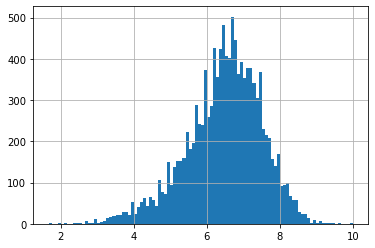

In [5]:
# distribution of the ratings
df['rating'].hist(bins=100)

### check if there's any relation between reviewer count and rating

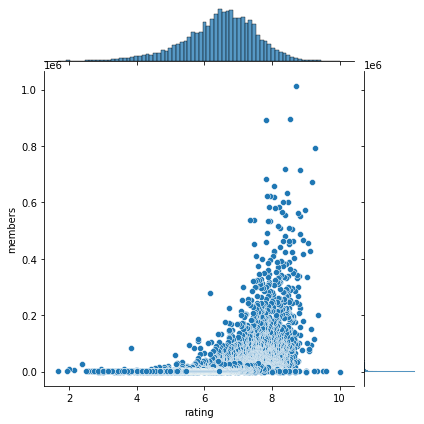

In [6]:
sns.jointplot(x='rating',y='members',data=df)

> interesting: the more people review something, higher the rating

### check if any correlation between episode count and rating

In [7]:
temp_df = df[df['type'] == 'TV']

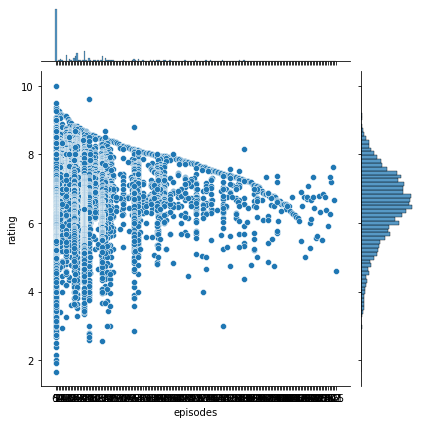

In [8]:
sns.jointplot(x="episodes", y="rating", data=df)

### check if ratings distribution is similar for diff types

In [9]:
df['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

In [10]:
df.type.value_counts()

TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: type, dtype: int64

<AxesSubplot:>

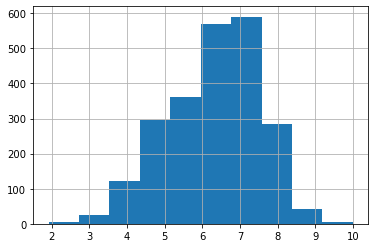

In [11]:
df[df['type'] == 'Movie']['rating'].hist(bins=10)

<AxesSubplot:>

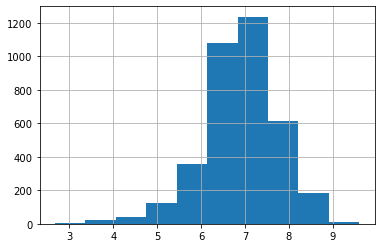

In [12]:
df[df['type'] == 'TV']['rating'].hist(bins=10)

In [13]:
df[df['type'] == 'Movie']['rating'].describe()

count    2297.000000
mean        6.318058
std         1.211988
min         1.920000
25%         5.420000
50%         6.470000
75%         7.250000
max        10.000000
Name: rating, dtype: float64

In [14]:
df[df['type'] == 'TV']['rating'].describe()

count    3671.000000
mean        6.902299
std         0.863526
min         2.670000
25%         6.440000
50%         6.940000
75%         7.460000
max         9.600000
Name: rating, dtype: float64

In [15]:
df[df['type'] == 'OVA']['rating'].describe()

count    3285.000000
mean        6.375221
std         0.858358
min         2.000000
25%         5.850000
50%         6.380000
75%         6.920000
max         9.250000
Name: rating, dtype: float64

In [16]:
df[df['type'] == 'Special']['rating'].describe()

count    1671.000000
mean        6.523501
std         0.887762
min         1.670000
25%         6.085000
50%         6.630000
75%         7.110000
max         8.660000
Name: rating, dtype: float64

> no special pattern based on media type

### looking for incomplete data

In [17]:
len([i for i in pd.isna(df['type']) if i])

25

In [18]:
len([i for i in pd.isna(df['genre']) if i])

62

### removing entries with missing data

In [19]:
df = df[df.genre.notna() & df.type.notna()]

In [20]:
df.shape

(12210, 7)

### one hot encoding the genres

In [21]:
one_hot = df['genre'].str.get_dummies(', ')
one_hot.rename(columns=lambda x: x.lower(), inplace=True)

In [22]:
one_hot.head()

,action,adventure,cars,comedy,dementia,demons,drama,ecchi,fantasy,game,...,shounen ai,slice of life,space,sports,super power,supernatural,thriller,vampire,yaoi,yuri
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df = df.drop(columns=['anime_id', 'genre', 'episodes', 'members'])
df.head()

,name,type,rating
0,Kimi no Na wa.,Movie,9.37
1,Fullmetal Alchemist: Brotherhood,TV,9.26
2,Gintama°,TV,9.25
3,Steins;Gate,TV,9.17
4,Gintama&#039;,TV,9.16


In [24]:
for genre in one_hot.columns:
    df[genre] = one_hot[genre]

In [25]:
df.head()

,name,type,rating,action,adventure,cars,comedy,dementia,demons,drama,...,shounen ai,slice of life,space,sports,super power,supernatural,thriller,vampire,yaoi,yuri
0,Kimi no Na wa.,Movie,9.37,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,Fullmetal Alchemist: Brotherhood,TV,9.26,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Gintama°,TV,9.25,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Steins;Gate,TV,9.17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Gintama&#039;,TV,9.16,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df[df['hentai'] == 1].sort_values(by=['rating'], ascending=False).head()

,name,type,rating,action,adventure,cars,comedy,dementia,demons,drama,...,shounen ai,slice of life,space,sports,super power,supernatural,thriller,vampire,yaoi,yuri
12251,Chou Do M na Hentai Mesu-tachi Otokoton Chouky...,OVA,8.38,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11114,Oni Chichi: Re-born,OVA,7.89,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11115,Mankitsu Happening,OVA,7.83,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11116,Koiito Kinenbi The Animation,OVA,7.75,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11117,Oni Chichi: Rebuild,OVA,7.75,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### compare using cosine distance

In [27]:
def cosine_sim(a, b):
    return np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [28]:
input_genres = 'action, romance, drama'
input_types = 'TV, OVA, movie'

In [29]:
all_genres = list(df)[3:]
input_types = [g.lower() for g in input_types.split(', ')]
input_genres = [g.lower() for g in input_genres.split(', ')]
one_hot_input = [0] * len(all_genres)
for genre in input_genres: one_hot_input[all_genres.index(genre)] = 1

In [30]:
df = df.to_numpy()

In [31]:
results = []
max_similarity = 0
for row in df:
    name = row[0]
    media_type = row[1]
    rating = row[2]
    one_hot_movie = row[3:]
    assert len(one_hot_movie) == len(one_hot_input), 'len of diff size, check pls'
    similarity_score = cosine_sim(one_hot_movie, one_hot_input)
    if similarity_score >= max_similarity and media_type.lower() in input_types:
        max_similarity = similarity_score
        results.append([name, media_type, rating, similarity_score])

In [32]:
results = np.array(results)

In [33]:
# reverse sorting the results based on cosine similarity
results = results[results[:, 3].argsort()[::-1]]
# keeping ones with max similarity
results = results[results[:,-1] == results[0,-1]]
# sort animes with same cosine similarity based on their ratings
results = results[results[:, 2].argsort()[::-1]]

In [34]:
results # name, type, original_rating, recommendation_scoring

array([['Wonderful Days', 'Movie', '7.17', '0.8660254037844387'],
       ['Xiao Qian', 'Movie', '6.76', '0.8660254037844387']], dtype='<U53')